# Importing libraries 🐍

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

# Dataset 📁

In [197]:
df = pd.read_csv("data.csv")

In [198]:
# Random 10 samples of data
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
30,8400000,7475,3,2,4,yes,no,no,no,yes,2,no,unfurnished
319,4060000,3000,4,1,3,yes,no,yes,no,yes,2,no,semi-furnished
479,2940000,3660,4,1,2,no,no,no,no,no,0,no,unfurnished
345,3850000,2015,3,1,2,yes,no,yes,no,no,0,yes,semi-furnished
296,4200000,4600,3,2,2,yes,no,no,no,yes,1,no,semi-furnished
253,4515000,3520,2,1,2,yes,no,no,no,no,0,yes,furnished
243,4550000,2550,3,1,2,yes,no,yes,no,no,0,no,furnished
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished
504,2653000,3185,2,1,1,yes,no,no,no,yes,0,no,unfurnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [199]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [200]:
df.shape # data shape

(545, 13)

In [201]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [202]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [203]:
df.duplicated().sum() # duplicate values check

0

In [204]:
df.corr() # correlations between data

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


# Data Visualization 📊📈📉

# Bar Plot 📊

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

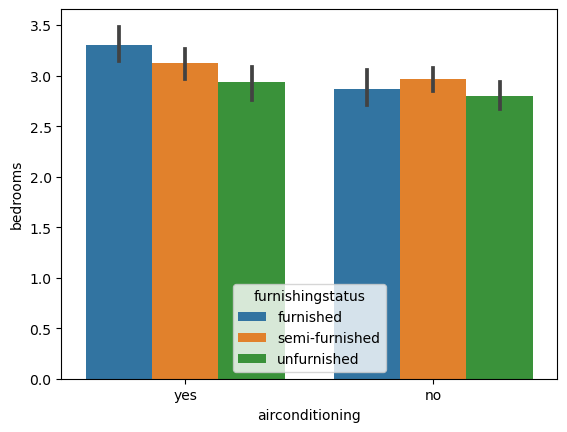

In [205]:
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df["furnishingstatus"])

<Axes: xlabel='hotwaterheating', ylabel='bathrooms'>

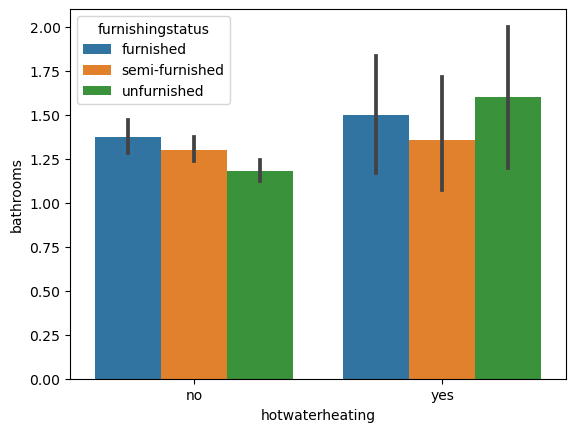

In [206]:
sns.barplot(x=df['hotwaterheating'],y=df['bathrooms'],hue=df["furnishingstatus"])

# Box Plot 📊


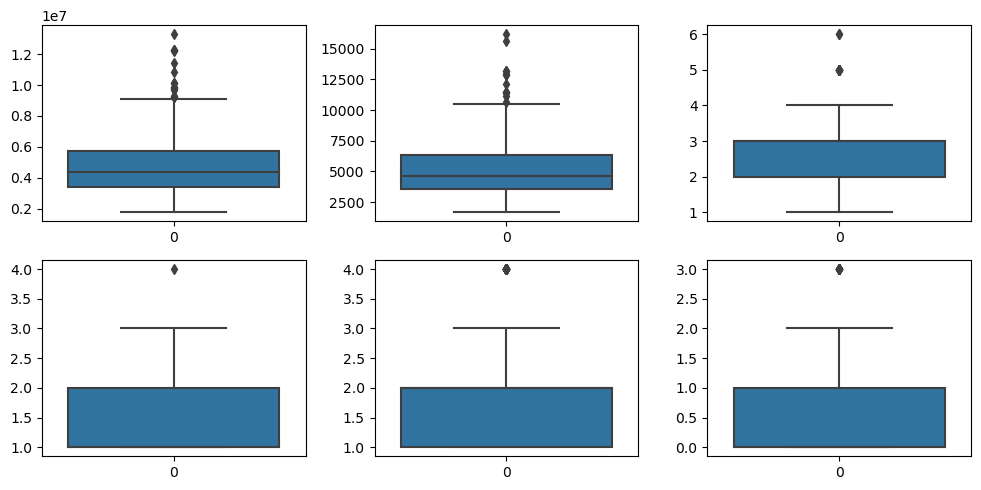

In [207]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

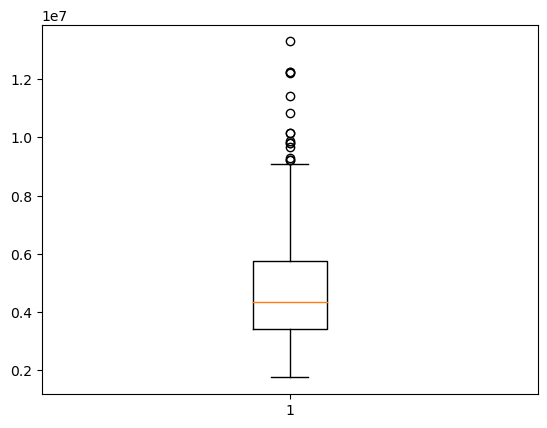

In [208]:
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

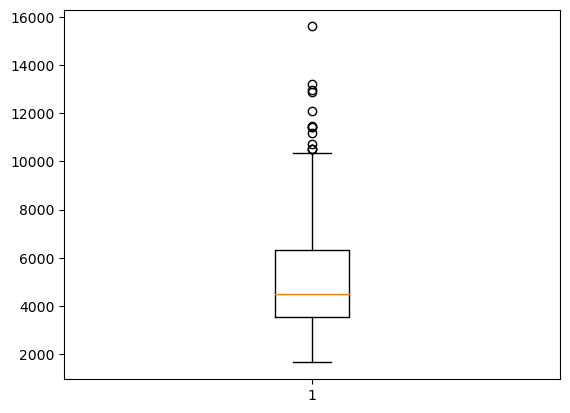

In [209]:
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

# Distplot 📊


<Axes: xlabel='bedrooms', ylabel='Density'>

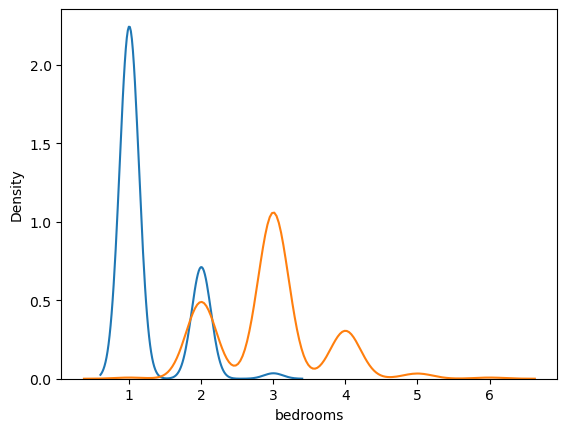

In [210]:
sns.distplot(df["bathrooms"],hist=False)
sns.distplot(df["bedrooms"],hist=False)

<Axes: xlabel='parking', ylabel='Density'>

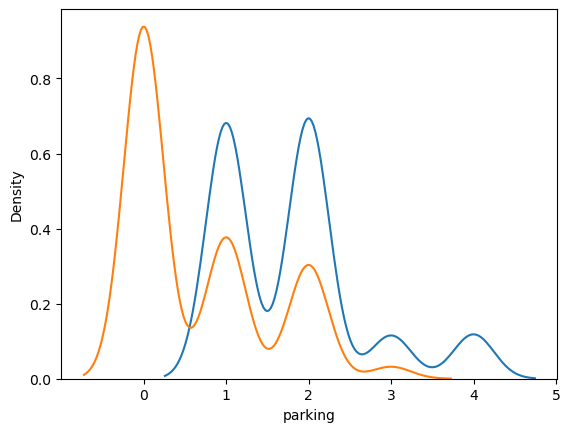

In [211]:
sns.distplot(df["stories"],hist=False)
sns.distplot(df["parking"],hist=False)

# Heatmap 🌡️

<Axes: >

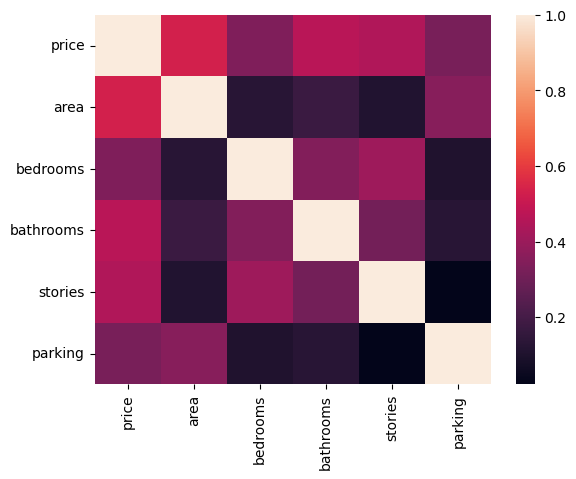

In [212]:
sns.heatmap(df.corr())

# Scatter Plot 📊📈


<Axes: xlabel='area', ylabel='price'>

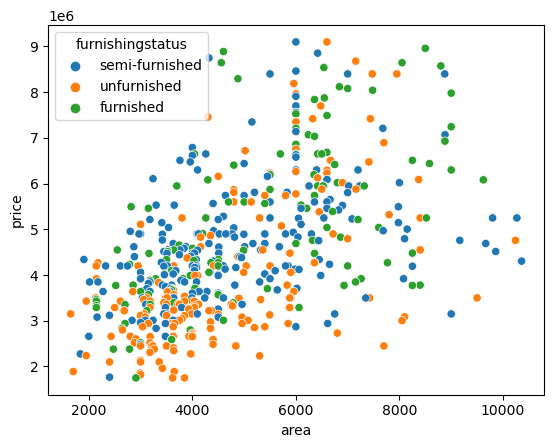

In [213]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

# Pair Plot 📊📈


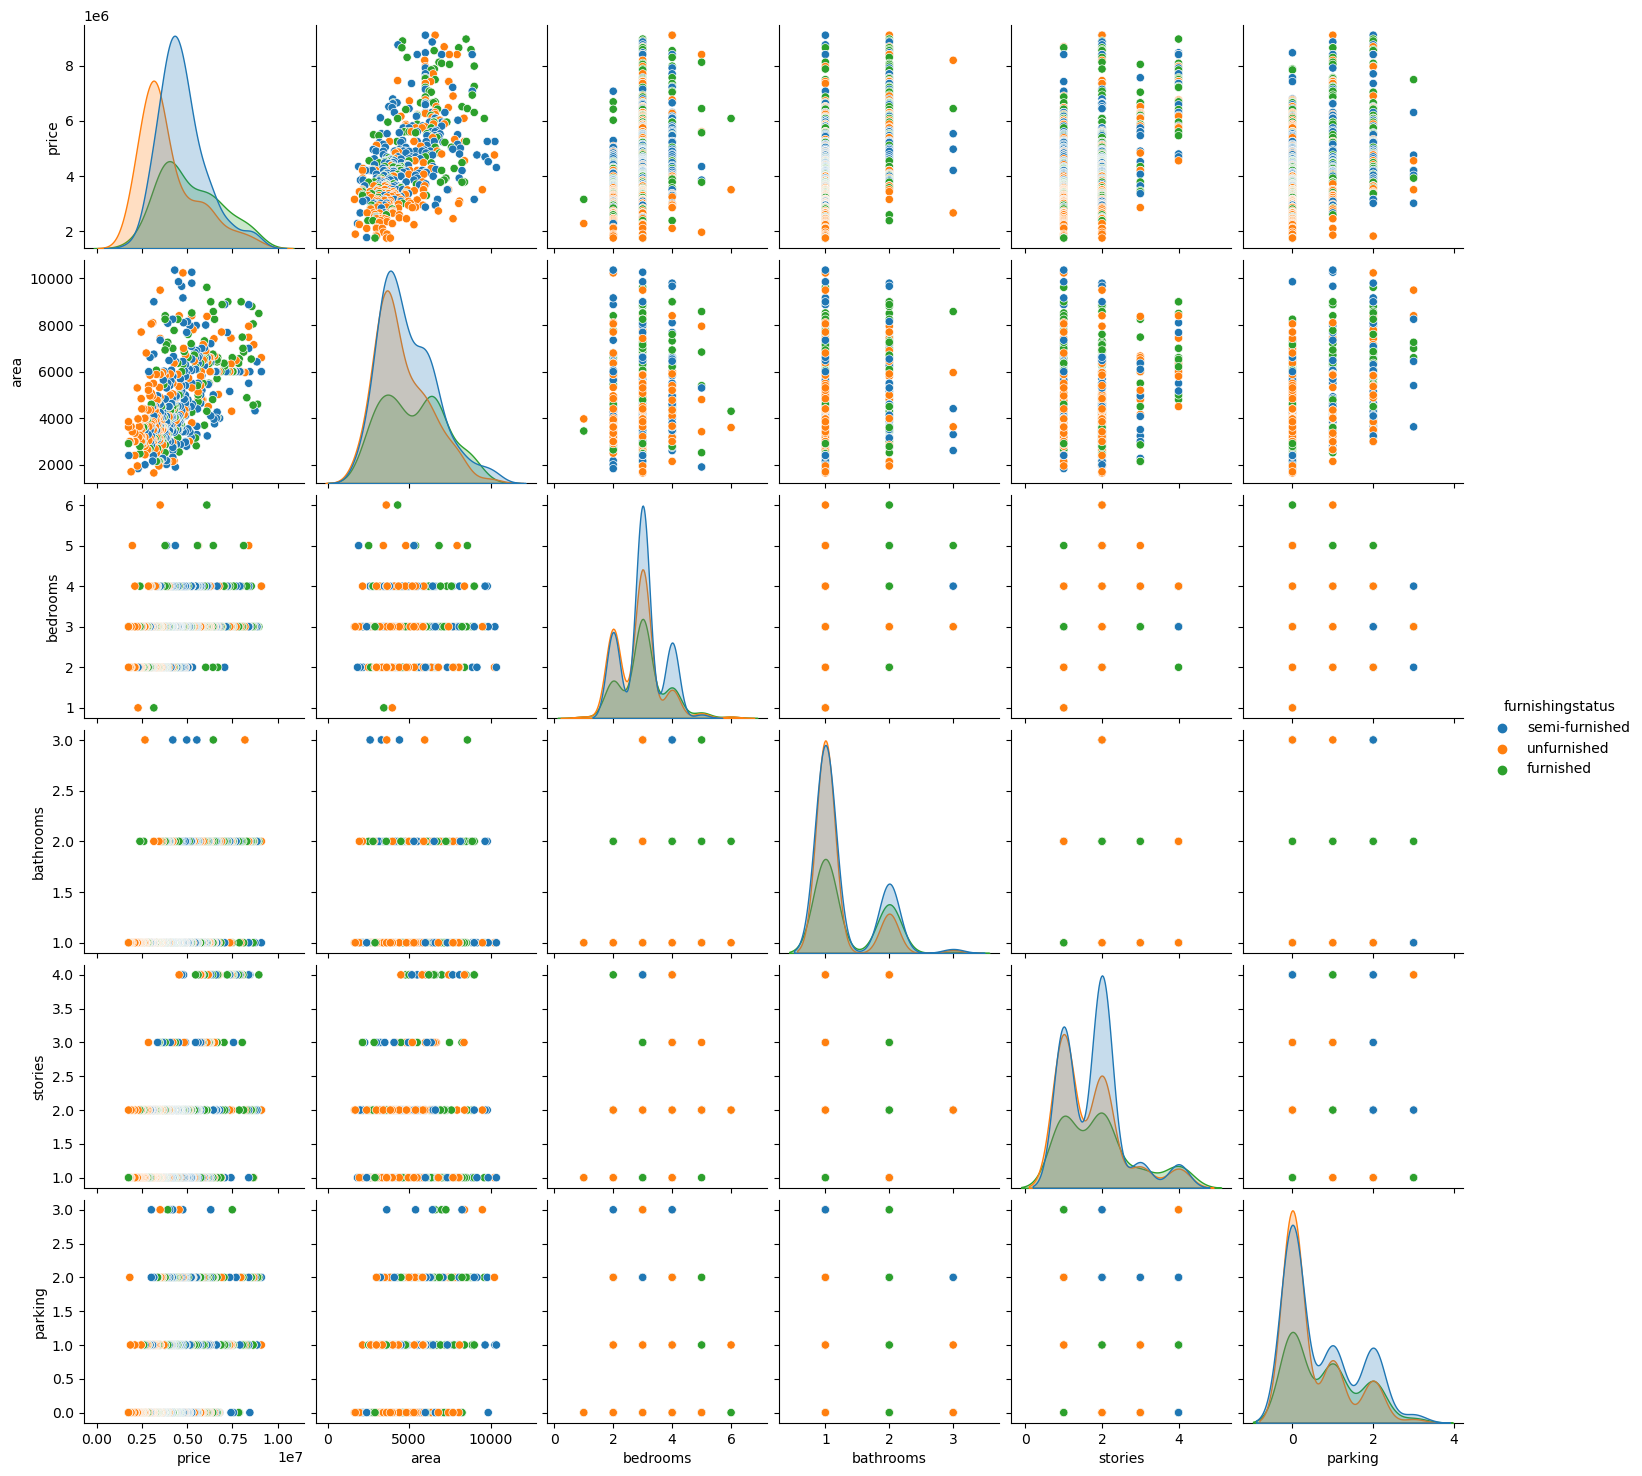

In [214]:
sns.pairplot(df,hue="furnishingstatus")

# Box Plot 📊


<Axes: xlabel='furnishingstatus', ylabel='price'>

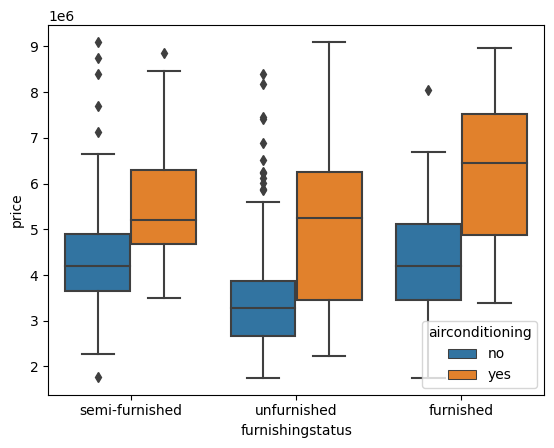

In [215]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

# Feature Engineering 🛠️


In [216]:
features =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

df[features] = df[features].apply(binary_map)

In [217]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [218]:
status = pd.get_dummies(df['furnishingstatus'])
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)
df = pd.concat([df, status], axis = 1)
df.drop(['furnishingstatus'], axis = 1, inplace = True)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [219]:
X = df.drop(['price'],axis=1)
y = df['price']

In [220]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Feature Scaling ⚖️


In [221]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training: Linear Regression 📈


In [222]:
model = LinearRegression()

In [223]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [224]:
y_predict = model.predict(X_test_scaled)

# Model Evaluation 🧪


In [225]:
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

In [226]:
score

0.7101226832065198

In [227]:
mae

692612.9700301245

# Model Predictions 🎯


In [229]:
y_predict

array([6181403.04061719, 3705547.69833685, 3256205.63555908,
       4500573.19752598, 4208702.5911666 , 5716073.47995037,
       3772349.7115169 , 3424486.49459368, 3769732.93754959,
       4323895.77609674, 2946743.41809858, 3224769.89551155,
       4836000.05999171, 6011198.77775729, 7631135.62037863,
       3012900.83058424, 6472938.83966992, 6097234.32744772,
       5035295.1671529 , 5966554.28715618, 5943853.07473112,
       4515488.17825698, 4216151.1415146 , 5555562.13058612,
       5115500.6440237 , 5331443.66489275, 5444454.28443828,
       2924877.23580637, 3020795.56341763, 4267879.8633321 ,
       3296723.57711783, 3470295.72729796, 6485975.51645593,
       6815873.35213131, 6690465.50747229, 3106822.26715476,
       2861995.79212766, 4590877.40580983, 6562356.0136685 ,
       4076715.20034822, 4463226.91627022, 6328313.53412505,
       4645630.36255801, 4847002.42571768, 3483747.49717775,
       4459363.3116988 , 6100208.35643391, 2840342.15824613,
       3071753.34861961,